## 동영상 읽고 출력하기

#### 카메라나 동영상으로부터 비디오 프레임 캡처하기
- cap = cv2.VideoCapture(0)
    - 0번 카메라로부터 비디오 캡처
    - 0 대신에 파일명을 입력하면 동영상으로부터 캡처
        - cv2.VideoCapture("images/video.mp4")
    - IP가 부여된 웹캠의 경우 IP와 카메라 번호를 입력
        - cap = cv2.VideoCapture("rtsp:127.0.0.1/0")
- cap.set(3, 480) : 비디오의 가로 크기 설정하기
- cap.set(4, 320) : 비디오의 세로 크기 설정하기
- w = cap.get(3) : 비디오의 가로 크기 가져오기
- h = cap.get(4) : 비디오의 세로 크기 가져오기
- ret, frame = cap.read()
    - 카메라로부터 비디오 파일을 읽고 프레임(frame) 이미지와 읽기 성공 여부(ret)를 반환 (True/False)

- key = cv2.waitKey(33)
    - 0.03초 동안 키 입력을 대기 (30프레임인 경우)
    - key 값은 아스키 코드로 반환
- cap.release()
    - 비디오 객체를 종료하고 메모리를 해제
    


- 아스키 코드 

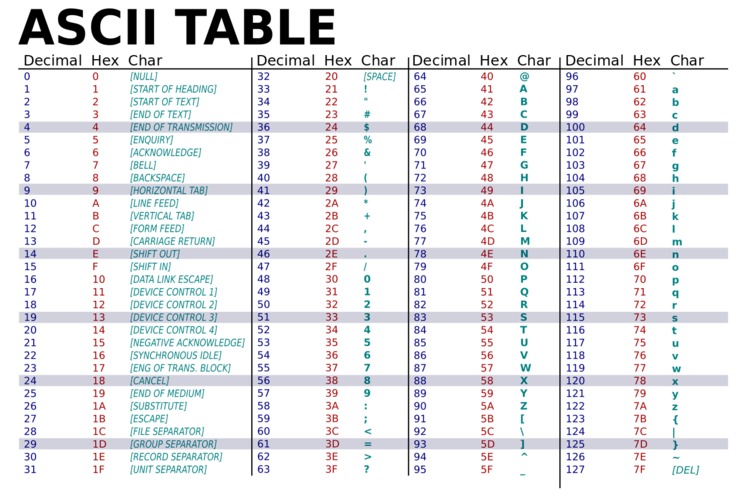

In [1]:
import cv2

video = cv2.VideoCapture("videos/puppy.mp4")

while cv2.waitKey(25) < 0:
    ret, frame = video.read()
    if not ret :
        print("Frame이 끝났습니다.")
        break
    
    cv2.imshow("puppy", frame)

video.release()
cv2.destroyAllWindows()

In [2]:
# 동영상 출력 중 소문자 a를 눌렀을 때 종료되도록
import cv2

video = cv2.VideoCapture("videos/puppy.mp4")

while video.isOpened() :
    ret, frame = video.read()
    if not ret :
        print("Frame이 끝났습니다.")
        break
    
    cv2.imshow("puppy", frame)
    if cv2.waitKey(25) == ord('a'):
        # 여기서 waitKey에 들어가는 인자값은 프레임 출력 속도를 의미(25는 1배속)
        print("동영상 종료")
        break
    
video.release()
cv2.destroyAllWindows()

동영상 종료


#### 동영상에서 한 프레임을 이미지 파일로 저장하기
- cv2.imwrite("파일명.확장자", 프레임이미지, 옵션)
    - params = [cv2.IMWRITE_PNG_COMPRESSION, 0] : 압축하지 않는 PNG, 세번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)

In [3]:
import cv2

video = cv2.VideoCapture("videos/puppy.mp4")

while cv2.waitKey(25) < 0:
    ret, frame = video.read()
    cv2.imwrite("images/frame.png", frame)
    break

In [4]:
# 'q' -> frame_00.jpg
# 'q' -> frame_01.jpg

import cv2

video = cv2.VideoCapture("videos/puppy.mp4")
cnt = 0

while video.isOpened():
    ret, frame = video.read()
    if not ret :
        print("Frame이 끝났습니다.")
        break
    
    cv2.imshow("puppy", frame)
    if cv2.waitKey(25) == ord('q'):
        cv2.imwrite(f"images/frame_{cnt}.png", frame, params = [cv2.IMWRITE_PNG_COMPRESSION, 0])
        cnt+=1

video.release()
cv2.destroyAllWindows()

Frame이 끝났습니다.


In [5]:
# 선생님 풀이

import cv2

video = cv2.VideoCapture("videos/puppy.mp4")
cnt = 0

while video.isOpened():
    ret, frame = video.read()
    if not ret :
        print("Frame이 끝났습니다.")
        break
    
    k = cv2.waitKey(25)

    path = 'images/frame_' + str(cnt) + '.jpg'

    if k == ord('q'):
        cv2.imwrite(path, frame)
        print(f'Frame ${cnt} saved!')
        cnt+=1

    elif k == ord('a'):
        break

video.release()
cv2.destroyAllWindows()

Frame이 끝났습니다.


#### 유튜브 영상 연동하기

##### pafy로 유튜브 영상 연동하기
- pafy : youtube의 메타 데이터를 수집/검색하거나 다운로드 할 수 있는 Python 라이브러리
- yt-dlp : 현재 업데이트가 되지 않는 youtube-dl을 업그레이드한 버전, 유튜브로부터 영상만 다운로드 (음성 제외)

In [6]:
# youtube의 메타 데이터를 수집/검색하거나 다운로드 할 수 있는 Python 라이브러리
!pip install pafy

In [7]:
# youtube로부터 영상만을 다운로드
!pip install youtube-dl

In [8]:
# 유튜브로부터 영상만을 다운로드 (youtube-dl 라이브러리 업그레이드 버전)
!pip install yt-dlp

In [9]:
!pip install --upgrade --force-reinstall "git+http://github.com/ytdl-org/youtube-dl.git"

  Cloning http://github.com/ytdl-org/youtube-dl.git to c:\users\smhrd\appdata\local\temp\pip-req-build-ifnj7c8j
  Resolved http://github.com/ytdl-org/youtube-dl.git to commit 16f5bbc464602773e61eeafef51d1dbc47987bb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for youtube_dl: filename=youtube_dl-2021.12.17-py2.py3-none-any.whl size=1983178 sha256=0a09ccaf158fc9f197f7fcbdaee1580c5cd7f648b42a41f479ae9fd92f93c6e6
  Stored in directory: C:\Users\SMHRD\AppData\Local\Temp\pip-ephem-wheel-cache-bpr9wckg\wheels\ee\17\46\4cf4bec9447d025f8c72a14887e5f53c5cc8043f589c0524af
Successfully built youtube_dl
  Attempting uninstall: youtube_dl
    Found existing installation: youtube_dl 2021.12.17
    Uninstalling youtube_dl-2021.12.17:
      Successfully uninstalled youtube_dl-2021.12.17


  Running command git clone --filter=blob:none --quiet http://github.com/ytdl-org/youtube-dl.git 'C:\Users\SMHRD\AppData\Local\Temp\pip-req-build-ifnj7c8j'


- video = pafy.new("유튜브 주소") : Youtube 주소로 영상 정보 가져오기

In [11]:
import pafy

url = 'https://www.youtube.com/watch?v=TfCmMled9vk'
video = pafy.new(url)

print(f'영상제목 : {video.title}')
print(f'별점 : {video.rating}')
print(f'뷰 수 : {video.viewcount}')
print(f'제작자 : {video.author}')

영상제목 : 귀여운 고양이 가족 입양보냅니다!
별점 : 0
뷰 수 : 74909
제작자 : 소녀의행성 Girlsplanet
